In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plotly and Cufflinks setup

#!pip install plotly
#!pip install cufflinks
#!pip install chart_studio

import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) #requires version >= 1.9.0

import cufflinks as cf

#for Notebooks
init_notebook_mode(connected = True)

#for offline use
cf.go_offline()

5.1.0


# Loading Data

In [3]:
#Enter file path
path = "./Pakistan Largest Ecommerce Dataset.csv"

In [4]:
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(path,  parse_dates = ["Customer Since", "M-Y"], low_memory = False, na_values = ["NaN", 'NaT', ' -   '])

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.head(5)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-07-01,2016-07-01,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-07-01,2016-07-01,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-07-01,2016-07-01,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-07-01,2016-07-01,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-07-01,2016-07-01,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [8]:
len(df)

1048575

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  object        
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  ob

# Data Pre-Processing

### Droping off Un-necessary Columns

In [10]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

#### Droping Columns = ['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']

In [11]:
drop_columns_0 = df.columns[-5:]
drop_columns_0

Index(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')

In [12]:
df.drop(drop_columns_0, axis = 1, inplace = True)

#### Droping Columns "items_id", "created_at", "increment_id", "sales_commission_code", "Working Date" , "BI Status" , "Year", "Month", "FY"

In [13]:
drop_columns_1 = ["item_id", "created_at", "increment_id", "sales_commission_code", "Working Date" , "BI Status" , "Year", "Month", "FY"]

In [14]:
df.drop(drop_columns_1, axis = 1, inplace = True)

### Re arranging Columns

In [15]:
df = df[['Customer ID', 'sku', 'category_name_1', 'status', 'qty_ordered',  'price', 'grand_total',
       'discount_amount', ' MV ', 'payment_method', 'Customer Since', 'M-Y']]

#### Check For Missing Data

In [16]:
missing = pd.DataFrame(df.isnull().sum())
missing.transpose()

,Customer ID,sku,category_name_1,status,qty_ordered,price,grand_total,discount_amount,MV,payment_method,Customer Since,M-Y
0,464062,464071,464215,464066,464051,464051,464051,464051,466283,464051,464062,464051


In [17]:
total_missing_values = df.isnull().sum().sum()
total_missing_values

5571065

### Droping off Missing Values Rows

In [18]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [19]:
#Checking again for missing values
missing = pd.DataFrame(df.isnull().sum())
missing.transpose()

,Customer ID,sku,category_name_1,status,qty_ordered,price,grand_total,discount_amount,MV,payment_method,Customer Since,M-Y
0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
total_missing_values = df.isnull().sum().sum()
total_missing_values

0

In [21]:
df.head(5)

,Customer ID,sku,category_name_1,status,qty_ordered,price,grand_total,discount_amount,MV,payment_method,Customer Since,M-Y
0,1.0,kreations_YI 06-L,Women's Fashion,complete,1.0,1950.0,1950.0,0.0,"1,950",cod,2016-07-01,2016-07-01
1,2.0,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,Beauty & Grooming,canceled,1.0,240.0,240.0,0.0,240,cod,2016-07-01,2016-07-01
2,3.0,Ego_UP0017-999-MR0,Women's Fashion,canceled,1.0,2450.0,2450.0,0.0,"2,450",cod,2016-07-01,2016-07-01
3,4.0,kcc_krone deal,Beauty & Grooming,complete,1.0,360.0,60.0,300.0,360,cod,2016-07-01,2016-07-01
4,5.0,BK7010400AG,Soghaat,order_refunded,2.0,555.0,1110.0,0.0,"1,110",cod,2016-07-01,2016-07-01


In [22]:
df[' MV '].isnull().sum()#.sum()

0

### Extract Year and Month from 'M-Y' Column

In [23]:
# Extract Year
df['Year'] = df['M-Y'].apply(lambda x: int(x.year)) 

# Extract Month
df['Month'] = df['M-Y'].apply(lambda x: int(x.month)) 

df.drop('M-Y', axis = 1, inplace = True)

### Looking for 0 (zeros) in integer or float value columns

In [24]:
df[df['qty_ordered'] == 0]['qty_ordered'].value_counts()

Series([], Name: qty_ordered, dtype: int64)

In [25]:
df[df['price'] == 0]['price'].value_counts()

Series([], Name: price, dtype: int64)

In [26]:
df[df[' MV '] == '0'][' MV '].value_counts()

Series([], Name:  MV , dtype: int64)

In [27]:
df[df['grand_total'] == 0]['grand_total'].value_counts()

0.0    9465
Name: grand_total, dtype: int64

In [28]:
#found 9465 cells containing 0.0
#replace 0.0 from corresponding values of ' MV ' column

In [29]:
def replace_zeros(x, y):
    if x == 0:
        return y
    else: 
        return x

In [30]:
df.columns

Index(['Customer ID', 'sku', 'category_name_1', 'status', 'qty_ordered',
       'price', 'grand_total', 'discount_amount', ' MV ', 'payment_method',
       'Customer Since', 'Year', 'Month'],
      dtype='object')

In [31]:
df['grand_total'] = df.apply(lambda z: replace_zeros(z['grand_total'], z[' MV ']), axis = 1)

In [32]:
#Checking again
df[df['grand_total'] == 0]['grand_total'].value_counts()

Series([], Name: grand_total, dtype: int64)

### DataFrame Without 0(Zeros) and Null Values

In [33]:
df.head(5)

,Customer ID,sku,category_name_1,status,qty_ordered,price,grand_total,discount_amount,MV,payment_method,Customer Since,Year,Month
0,1.0,kreations_YI 06-L,Women's Fashion,complete,1.0,1950.0,1950.0,0.0,"1,950",cod,2016-07-01,2016,7
1,2.0,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,Beauty & Grooming,canceled,1.0,240.0,240.0,0.0,240,cod,2016-07-01,2016,7
2,3.0,Ego_UP0017-999-MR0,Women's Fashion,canceled,1.0,2450.0,2450.0,0.0,"2,450",cod,2016-07-01,2016,7
3,4.0,kcc_krone deal,Beauty & Grooming,complete,1.0,360.0,60.0,300.0,360,cod,2016-07-01,2016,7
4,5.0,BK7010400AG,Soghaat,order_refunded,2.0,555.0,1110.0,0.0,"1,110",cod,2016-07-01,2016,7


In [34]:
len(df)

582100

# Task 2: Visualize payment method and order status frequency

## Overall Payment Methods Count from 2016-2018

In [35]:
df['payment_method'].nunique()

18

In [36]:
pd.DataFrame(df['payment_method'].unique()).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,cod,ublcreditcard,mygateway,customercredit,cashatdoorstep,mcblite,internetbanking,marketingexpense,productcredit,financesettlement,Payaxis,jazzvoucher,jazzwallet,Easypay,Easypay_MA,easypay_voucher,bankalfalah,apg


In [37]:
df_payment_method = pd.DataFrame(df.payment_method.value_counts())
df_payment_method = df_payment_method.sort_values(by = 'payment_method', ascending = False)
df_payment_method.transpose()

,cod,Payaxis,Easypay,jazzwallet,easypay_voucher,bankalfalah,jazzvoucher,Easypay_MA,customercredit,apg,ublcreditcard,cashatdoorstep,mcblite,mygateway,internetbanking,productcredit,marketingexpense,financesettlement
payment_method,269811,97606,82829,35130,31136,23011,15611,14000,7545,1758,882,732,723,669,472,125,45,15


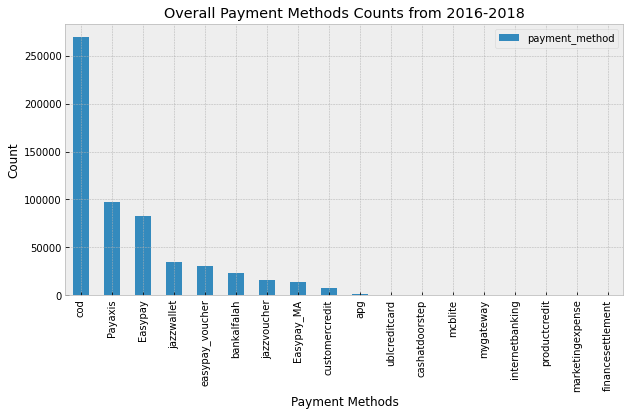

In [38]:
plt.style.use('bmh')

df_payment_method.plot.bar(title = 'Overall Payment Methods Counts from 2016-2018', 
                           xlabel = 'Payment Methods', 
                           ylabel = 'Count', 
                           figsize = (10, 5))
plt.show()


## Yearly Payment Methods

### (A) Yearly Payment Methods

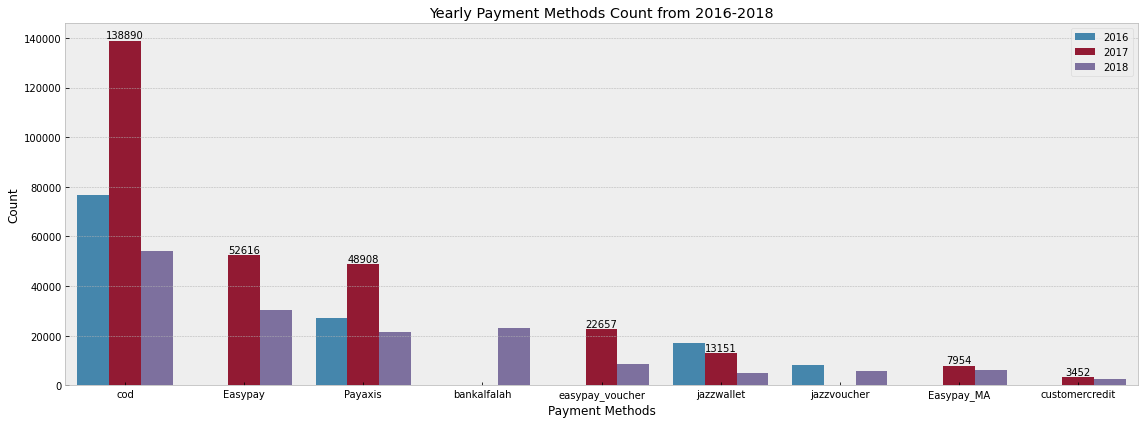

In [39]:
# Preparing Data
df_payMethod_year = pd.DataFrame(df[['payment_method', 'Year']].value_counts())
df_payMethod_year = df_payMethod_year.reset_index()
df_payMethod_year.columns = ['Payment Methods', 'Year', 'Count']
data = df_payMethod_year.sort_values(by = 'Count', ascending = False).head(20)


# Plot
fig, ax = plt.subplots(figsize = (16, 6))

sns.barplot('Payment Methods', 'Count', hue = 'Year', data = data)

# add the annotation
ax.bar_label(ax.containers[-2], fmt = '\n%.0f', label_type = 'edge')

# add Labels
ax.set(xlabel = 'Payment Methods')
ax.set(ylabel = 'Count')
ax.set(title = 'Yearly Payment Methods Count from 2016-2018')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, horizontalalignment = 'center')
ax.legend(loc = 1)
plt.tight_layout()
plt.show()

### (B) Yearly Payment Methods

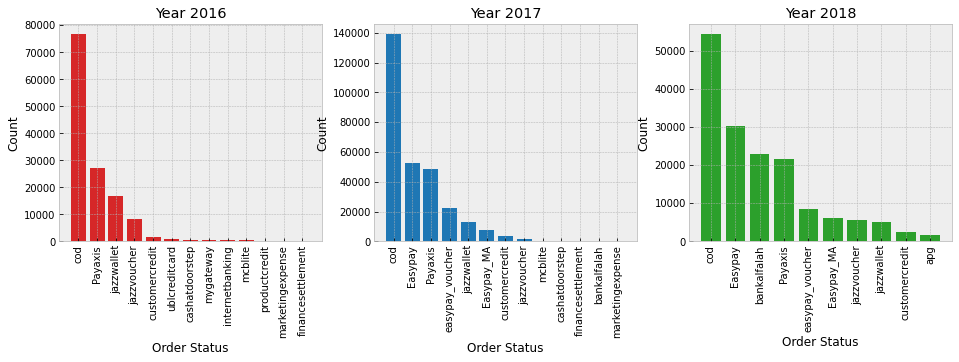

In [40]:
# Prepare Data
years = df_payMethod_year.Year.unique()
years = sorted(years)

#data = df_payMethod_year[df_payMethod_year['Year'] == j].value_counts().reset_index().sort_values(by = ['Count'], ascending = False)
mycolors = ['tab:red', 'tab:blue', 'tab:green'] #, 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']

# Plot
fig, ax = plt.subplots(1, len(years), sharey = False, figsize = (16, 4))

for i, j in enumerate(years):
    
    data = df_payMethod_year[df_payMethod_year['Year'] == j].value_counts().reset_index().sort_values(by = ['Count'], ascending = False)
        
    ax[i].bar(data['Payment Methods'], data.Count, color = mycolors[i])
    
    #labels
    ax[i].set(xlabel = 'Order Status')
    ax[i].set(ylabel = 'Count')
    ax[i].set(title = 'Year ' + str(j))
    ax[i].tick_params(labelrotation = 90, axis='x')

## Overall Order Status Counts from 2016-2018

In [41]:
order_status = pd.DataFrame(df['status'].unique())
order_status.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,complete,canceled,order_refunded,received,refund,closed,fraud,holded,exchange,pending_paypal,paid,\N,cod,pending,processing,payment_review


In [42]:
df['status'].nunique()

16

In [43]:
df_order_status = pd.DataFrame(df['status'].value_counts())

In [44]:
df_order_status.transpose()

,complete,canceled,received,order_refunded,refund,cod,paid,closed,payment_review,pending,processing,holded,fraud,pending_paypal,\N,exchange
status,233315,200386,76922,59022,7864,2753,1150,494,57,48,33,31,10,7,4,4


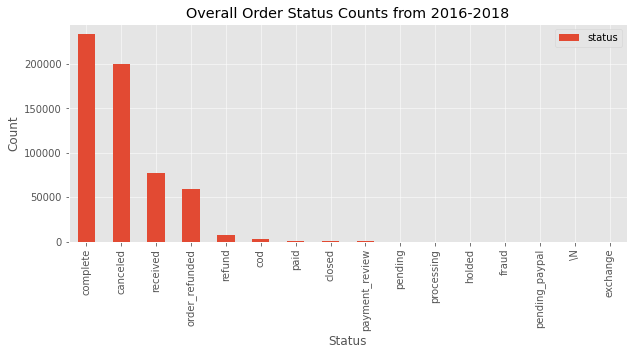

In [45]:
plt.style.use('ggplot')
df_order_status.plot.bar(title = 'Overall Order Status Counts from 2016-2018', 
                         xlabel = 'Status', 
                         ylabel = 'Count', 
                         figsize = (10, 4),
                         sort_columns = df_order_status.sort_values('status', ascending = False))
plt.show()

## Yearly Orders Status

### (A) Yearly Order Status

In [46]:
df_status_year = pd.DataFrame(df[['status', 'Year']].value_counts())
df_status_year = df_status_year.reset_index()
df_status_year.columns = ['Status', 'Year', 'Count']

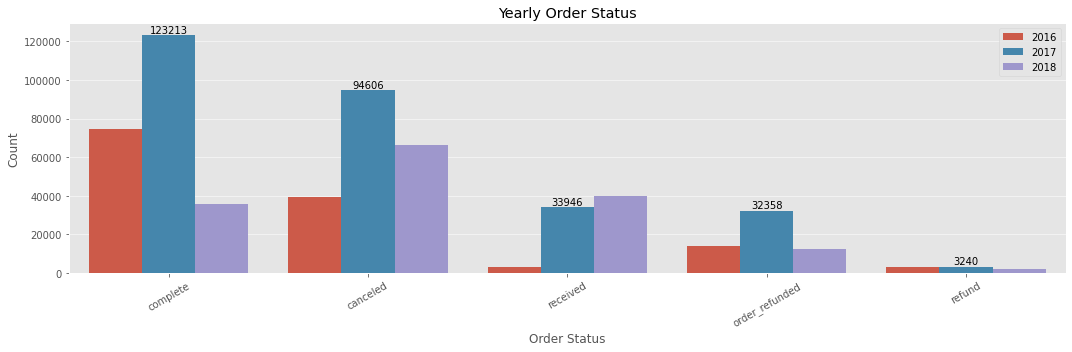

In [47]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.barplot(x = 'Status', y = 'Count', hue = 'Year', data = df_status_year.head(15)) #

# add the annotation
ax.bar_label(ax.containers[-2], fmt = '\n%.0f', label_type = 'edge')

# add Labels
ax.set(xlabel = 'Order Status')
ax.set(ylabel = 'Count')
ax.set(title = 'Yearly Order Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, horizontalalignment = 'center')
ax.legend(loc = 1)
plt.tight_layout()
plt.show()

### (B) Yearly Order Status

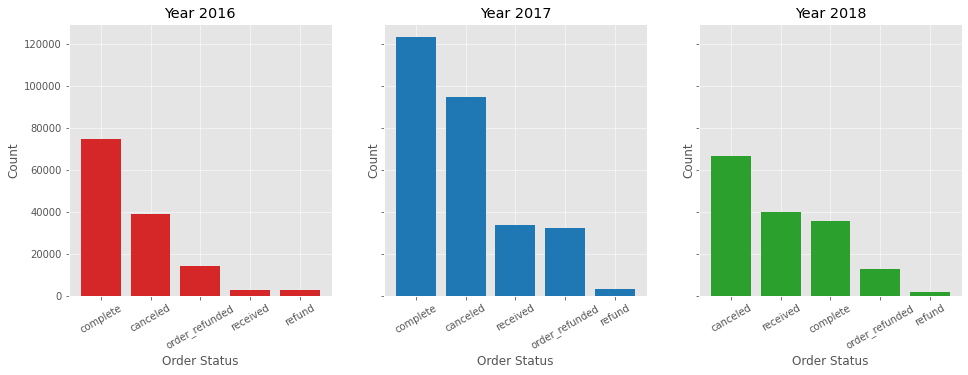

In [48]:
# prepare data
years = df_status_year.Year.unique()
years = sorted(years)
#data = df_status_year[df_status_year['Year'] == j][['Status', 'Count']].value_counts().reset_index().sort_values(by = 'Count', ascending = False).head(5)
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      

#Plot

fig, ax = plt.subplots(1, len(years), sharey = True, figsize = (16, 5))

for i, j in enumerate(years):
    
    data = df_status_year[df_status_year['Year'] == j][['Status', 'Count']].value_counts().reset_index().sort_values(by = 'Count', ascending = False).head(5)
    
    ax[i].bar(data.Status, data.Count, color = mycolors[i])
    
    
    ax[i].set(xlabel = 'Order Status')
    ax[i].set(ylabel = 'Count')
    ax[i].set(title = 'Year ' + str(j))
    ax[i].tick_params(labelrotation = 30, axis='x')    

In [49]:
payment_method_status = pd.crosstab(df.payment_method, df.status) #margins = True
payment_method_status

status,\N,canceled,closed,cod,complete,exchange,fraud,holded,order_refunded,paid,payment_review,pending,pending_paypal,processing,received,refund
payment_method,,,,,,,,,,,,,,,,
Easypay,0,52009,16,0,19192,0,0,2,2621,241,0,0,0,0,8022,726
Easypay_MA,0,9197,0,0,3111,0,0,0,307,35,0,0,0,0,1206,144
Payaxis,0,61245,71,0,22805,0,9,8,3813,397,0,0,0,4,8701,553
apg,0,1361,0,0,27,0,0,0,42,20,0,0,0,0,305,3
bankalfalah,0,16151,5,0,585,0,0,15,729,183,57,0,0,8,5164,114
cashatdoorstep,0,5,0,0,674,0,0,0,30,0,0,0,0,0,5,18
cod,4,21040,360,2753,147718,4,0,6,48292,0,0,0,7,20,44220,5387
customercredit,0,46,24,0,4146,0,0,0,1267,97,0,3,0,0,1739,223
easypay_voucher,0,12164,2,0,16058,0,0,0,480,13,0,33,0,0,2146,240


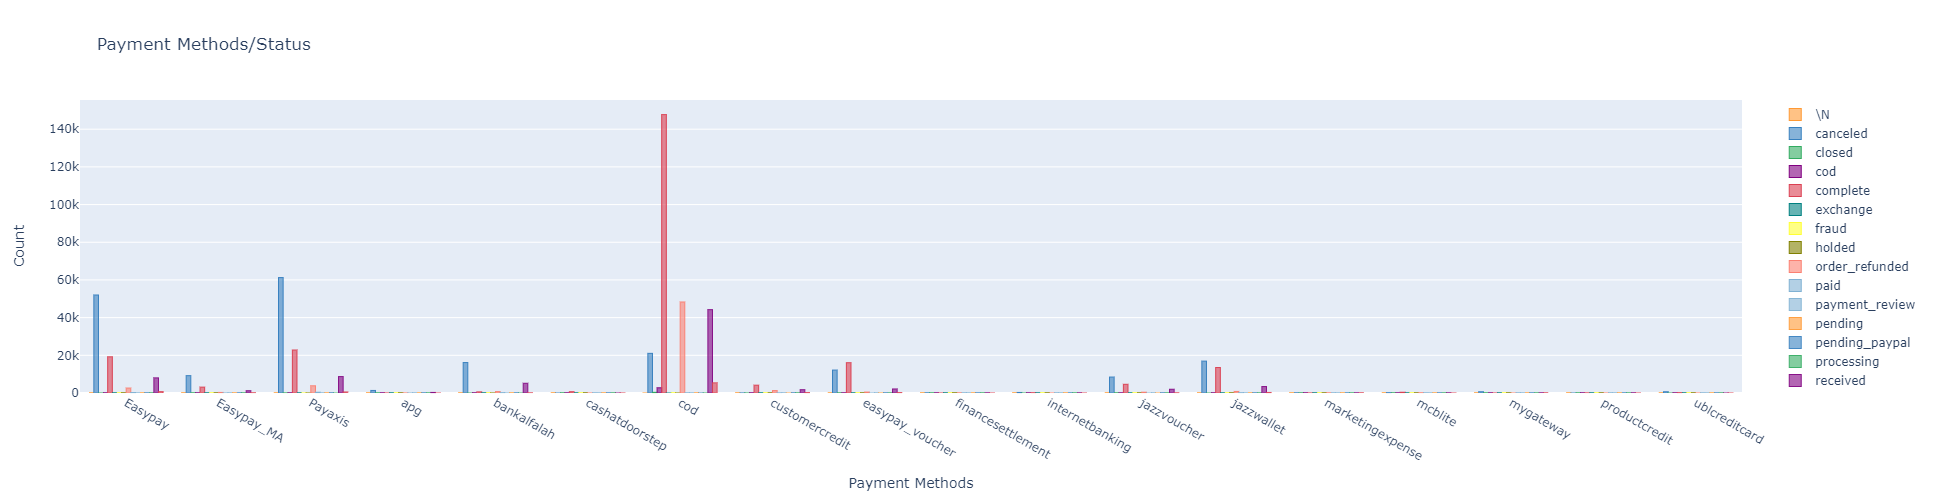

In [50]:
layout = go.Layout(title = "Payment Methods/Status", 
                   xaxis = {'title': 'Payment Methods'}, 
                   yaxis = {'title': 'Count'}, 
                   showlegend = True, 
                   width = 1000, 
                   height = 500,)

payment_method_status.iplot(kind = 'bar', layout = layout) 

#mycolor = ['Black', 'Purple', 'Green', 'Grey', 'Blue', 'Orange', 'Red', 'Violet']
# colorscale = Greens, Greys,YlGnBu,Greens,YlOrRd,Bluered,RdBu,Reds,Bl ues,Picnic,Rainbow,Portland,Jet,Hot,Blackbody,Earth,Electric,Vi ridis,Cividis.


In [51]:
# import plotly.express as px
# fig = px.bar(payment_method_status)
# fig.update_xaxes(title = 'Payment Method', title_font = dict(size = 18, family = 'Courier', color = 'crimson'))
# fig.update_yaxes(title = 'Count', title_font = dict(size = 18, family = 'Courier', color = 'crimson'))
# fig.
# fig.show()

# Task 3: Correlation between Payment Method and Order Status

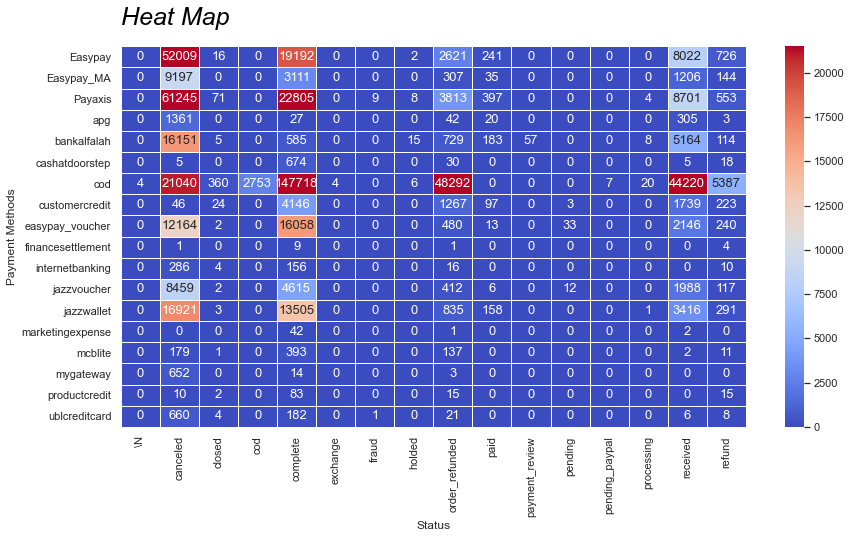

In [52]:
plt.figure(figsize = (14, 7))
sns.set_theme(context = 'notebook', style = 'darkgrid', palette = 'bright', font = 'sans-serif', font_scale = 1, color_codes = True, rc = None)

sns.heatmap(payment_method_status, 
            cmap = 'coolwarm', 
            robust = True, 
            annot = True, 
            annot_kws = {'size':13}, 
            fmt = ".0f", 
            linecolor = 'white', 
            linewidths = 1, 
            cbar = True, 
            square = False,
            xticklabels = True,
            yticklabels = True) 

plt.xlabel("Status")
plt.ylabel("Payment Methods")
plt.text(0,-1, "Heat Map", fontsize = 25, color = 'Black', fontstyle = 'italic')
plt.show()

# Task 4:  Find Correlation Between Order Date and Item Category

In [53]:
#df[df['Year'] ==  2016][['category_name_1', 'Month']].sort_values(by = 'Month', ascending = True)

In [54]:
df_cat_orderDate = pd.DataFrame(df[['category_name_1', 'Year', 'Month']])
df_cat_orderDate = df_cat_orderDate.sort_values(by = ['Year', 'Month'])
df_cat_orderDate

,category_name_1,Year,Month
0,Women's Fashion,2016,7
1,Beauty & Grooming,2016,7
2,Women's Fashion,2016,7
3,Beauty & Grooming,2016,7
4,Soghaat,2016,7
...,...,...,...
584519,Women's Fashion,2018,8
584520,Mobiles & Tablets,2018,8
584521,Mobiles & Tablets,2018,8
584522,Mobiles & Tablets,2018,8


In [55]:
df_cat_orderDate['Year'] =  df_cat_orderDate['Year'].apply(lambda x: str(x))
df_cat_orderDate['Month'] = df_cat_orderDate['Month'].apply(lambda x: str(x))

df_cat_orderDate['Order_Date'] = df_cat_orderDate['Year'] + "-" + df_cat_orderDate['Month']
df_cat_orderDate = pd.crosstab(df_cat_orderDate.category_name_1, df_cat_orderDate.Order_Date) #, margins = True
df_cat_orderDate

Order_Date,2016-10,2016-11,2016-12,2016-7,2016-8,2016-9,2017-1,2017-10,2017-11,2017-12,2017-2,2017-3,2017-4,2017-5,2017-6,2017-7,2017-8,2017-9,2018-1,2018-2,2018-3,2018-4,2018-5,2018-6,2018-7,2018-8
category_name_1,,,,,,,,,,,,,,,,,,,,,,,,,,
Appliances,616,6279,860,378,339,1226,636,671,14495,1751,314,1452,890,3338,1044,639,1423,400,1237,2926,2895,986,4274,1341,806,1105
Beauty & Grooming,1388,5754,1080,2425,1846,1405,880,1089,5003,1833,685,1239,1265,1382,1482,1178,1660,696,1262,1098,1267,873,1685,1191,780,958
Books,73,89,52,22,165,37,39,22,44,7,43,97,53,40,63,45,36,24,16,12,36,43,28,36,33,37
Computing,237,2616,317,214,203,487,292,677,2635,437,194,448,343,889,305,568,726,170,370,677,871,312,821,402,318,373
Entertainment,291,1892,333,64,91,851,267,1312,5654,289,200,691,371,1963,453,571,951,456,485,2605,2058,284,2192,483,410,1101
Health & Sports,532,1972,671,181,371,433,511,307,1054,321,561,495,490,1286,532,533,555,289,483,630,1031,965,1275,821,785,417
Home & Living,619,2984,451,389,427,760,358,472,6022,957,724,1014,952,1555,768,763,832,341,728,1173,808,723,808,596,595,585
Kids & Baby,578,1116,591,160,509,461,497,384,1802,635,360,758,660,1380,1125,1150,683,229,422,760,422,480,432,307,283,257
Men's Fashion,1954,15719,2840,1003,2587,1264,2022,2267,16280,2931,2079,2554,3284,6809,3935,1942,3681,1632,1573,3658,3417,1681,2168,1774,1246,1506


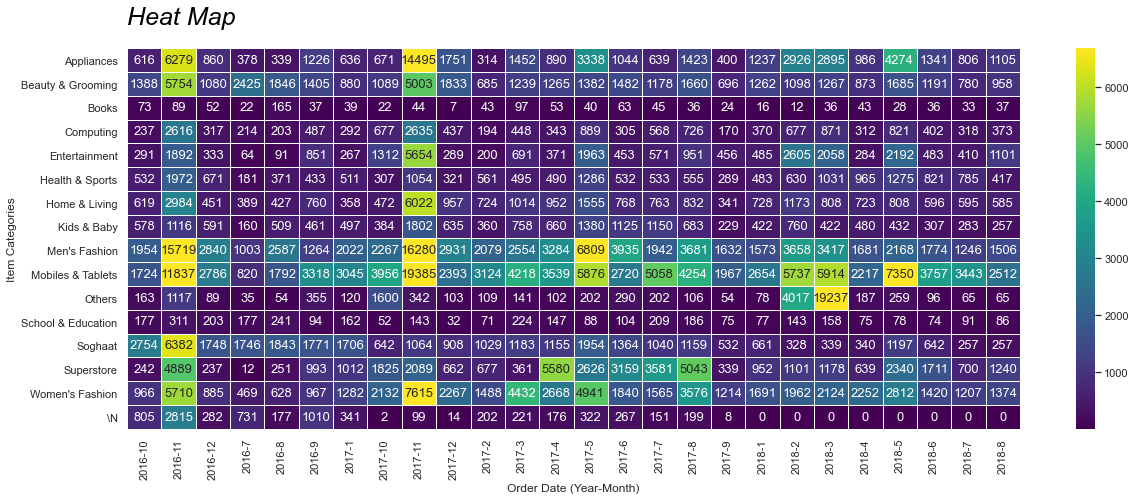

In [56]:
plt.figure(figsize = (20, 7))
sns.set_theme(context = 'notebook', style = 'darkgrid', palette = 'bright', font = 'sans-serif', font_scale = 1, color_codes = True, rc = None)

sns.heatmap(df_cat_orderDate, 
            cmap = 'viridis', 
            robust = True, 
            annot = True, 
            annot_kws = {'size':13}, 
            fmt = ".0f", 
            linecolor = 'white', 
            linewidths = 1, 
            cbar = True, 
            square = False,
            xticklabels = True,
            yticklabels = True) 

plt.xlabel("Order Date (Year-Month)")
plt.ylabel("Item Categories")
plt.text(0,-1, "Heat Map", fontsize = 25, color = 'Black', fontstyle = 'italic')
plt.show()

In [57]:
#df[df['Year'] == 2016] & df[df['Month'] == 10][]